In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

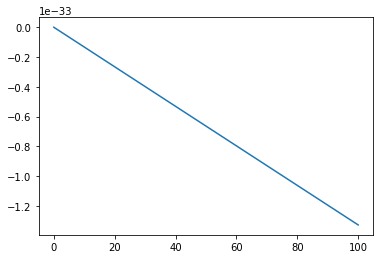

In [16]:


q=72 #number of surface proteins
Ccmc=0.2*10**(-6) #critical concentration, micrometer
alpha=2 #line energy kT 
beta=70*10**(-6) #rate of attachment, Hz/micrometer
c1t0=10*10**(-6) #initial concentration, micrometers
Rh=0.619*10**(-6) #hydrodynamic radius, micrometer, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2 #estimate for spherical capsid radius
T=293 #room temp, K
k=1.38064852*10**(-23) #boltzmann constant

Z= 0.9544*10**(-3) #viscosity room temp water, millipascals
D1=k*T/(6*np.pi)*Rh*Z
j=D1*2*R/q

init= [0]*q
init[0]=c1t0
t=np.linspace(0,100,101) 
def Con(cn,t):#builds a q size list of dcdt
    dcdt=[0]*q#initializes list of q zeros
    dcdt[0]=-(cn[0]**2)*j*np.sqrt(q-1)+cn[1]*cn[0]*j*np.sqrt(q-1)*np.exp(alpha*(np.sqrt(2*q-4)+np.sqrt(q-1)))/(cn[0]*2/Ccmc)
    
    n = 1
    i = 1
    while i < len(dcdt)-2:
        n=i+1
        bn=cn[0]*j*np.sqrt(n*(q-n))#unbinding energy for capsid size n
        bnm1=cn[0]*j*np.sqrt((n-1)*(q-n+1))#unbinding energy for capsid size n+1
        Gn=n*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt(n*(q-n))#free energy for capsid size n
        Gnp1=(n+1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n+1)*(q-n-1))#free energy for capsid size n+1
        Gnm1=(n-1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n-1)*(q-n+1))#free energy for capsid size n-1
        alpn=bnm1*np.exp(Gn-Gnm1)#binding energy for capsid size n
        alpnp1=bn*np.exp(Gnp1-Gn)#binding energy for capsid size n+1
        dcdt[n]=bnm1*cn[i-1]-alpn*cn[i]-bn*cn[i]+alpnp1*cn[i+1]#list of rates for all Cn at specific time
        i+=1
    
    dcdt[q-1]=cn[0]*j*np.sqrt((q-1))*cn[q-1]-cn[0]*j*np.sqrt(q+1)*np.exp(np.sqrt(q-1)-1)*(cn[0]*2/Ccmc)**2#ending rate adjustment
    return(dcdt)
      
x=odeint(Con,init,t)#gives qxt matrix for Cns at each step

Cq= x[:,q-1]



plt.plot(t,Cq)